## Multinomial Logistics Regression
### Dry Beans Classification
### https://github.com/santiagoahl/dry-beans-classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
import joblib

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Data Import
df = pd.read_csv('../../../data/dry_bean.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
print(f'The bean classes are {df["Class"].unique()}')

The bean classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


## Data preprocessing

In [5]:
# Duplicates dropping
df.drop_duplicates(inplace=True)

In [6]:
# Check Null Data
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Balancing the dataset: SMOTE

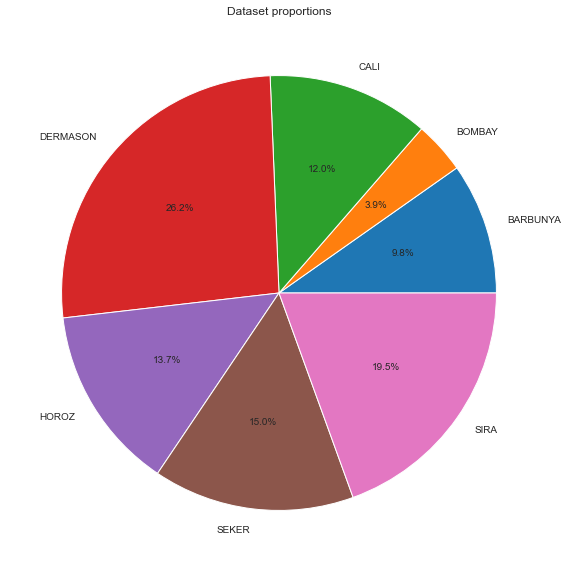

In [7]:
# Notice how unbalanced is the dataset
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [8]:
sm = SMOTE()

In [9]:
x = df.drop('Class', axis=1)
y = df.Class

In [10]:
x_sm, y_sm = sm.fit_resample(x, y)

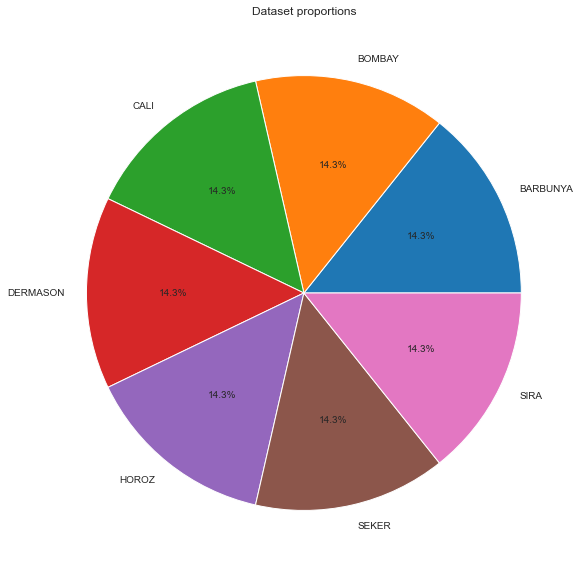

In [11]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

## Mapping

In [19]:
list(np.unique(y_sm))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [20]:
y_sm.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y_sm)))])

0        5
1        5
2        5
3        5
4        5
        ..
24817    6
24818    6
24819    6
24820    6
24821    6
Name: Class, Length: 24822, dtype: int64

## Drop correlated features

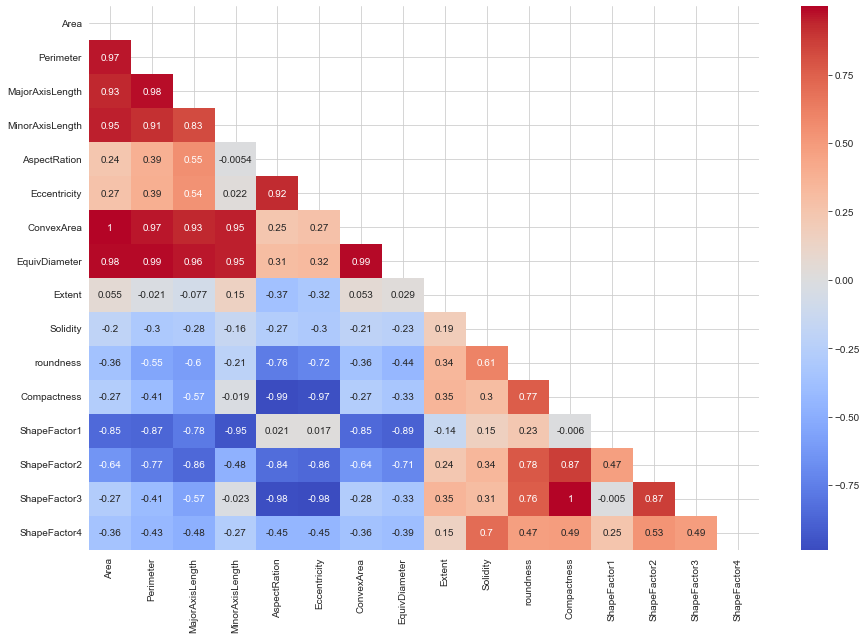

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()), annot=True)
plt.show()

We observe that ConvexArea is deeply correlated with Area, Perimeter, MajorAxisLength and MinorAxisLength.
EquivDiameter is also over correlated with several features. So we will drop both features.

In [22]:
x_sm.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

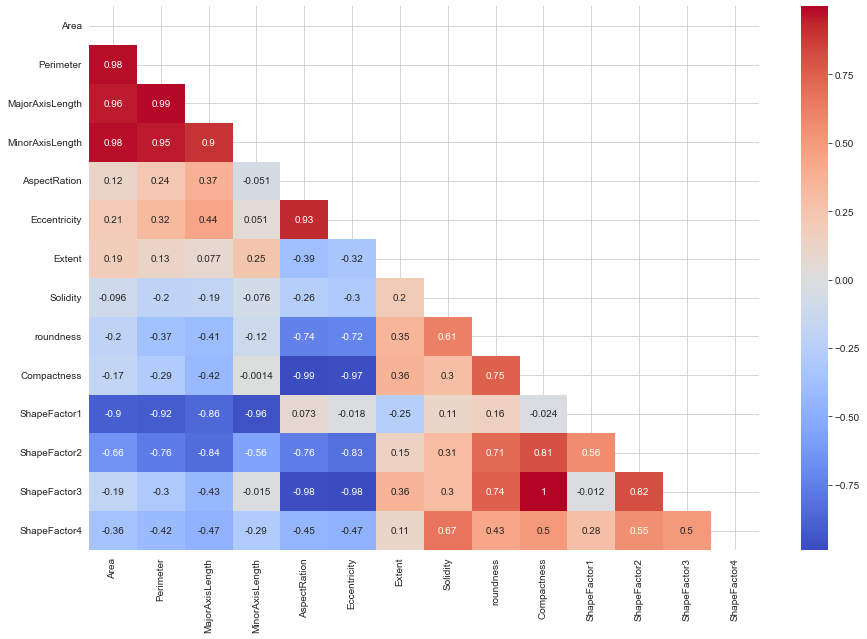

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=x_sm.corr(), cmap='coolwarm', mask=np.triu(x_sm.corr()), annot=True)
plt.show()

## Data split & normalization

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, shuffle=True, test_size=0.2)

In [25]:
sc = StandardScaler()
sc.fit_transform(x_train)
sc.transform(x_test)

array([[-0.53513375, -0.68706065, -0.90591206, ...,  1.7127889 ,
         2.24898076,  0.95417469],
       [-0.72375548, -0.90304584, -1.16091785, ...,  2.3702576 ,
         2.47439273,  0.91597054],
       [-0.75288298, -0.97944087, -1.12169186, ...,  1.92592976,
         1.81311756,  0.92585454],
       ...,
       [ 2.23674213,  2.04504529,  2.04578949, ..., -1.18651861,
        -0.19950179, -0.62040764],
       [-0.118169  ,  0.23235308, -0.09670557, ..., -0.10246655,
         0.25847551,  0.69755135],
       [ 2.0790099 ,  1.92812511,  1.85345528, ..., -1.09146124,
         0.0068064 , -0.35013889]])

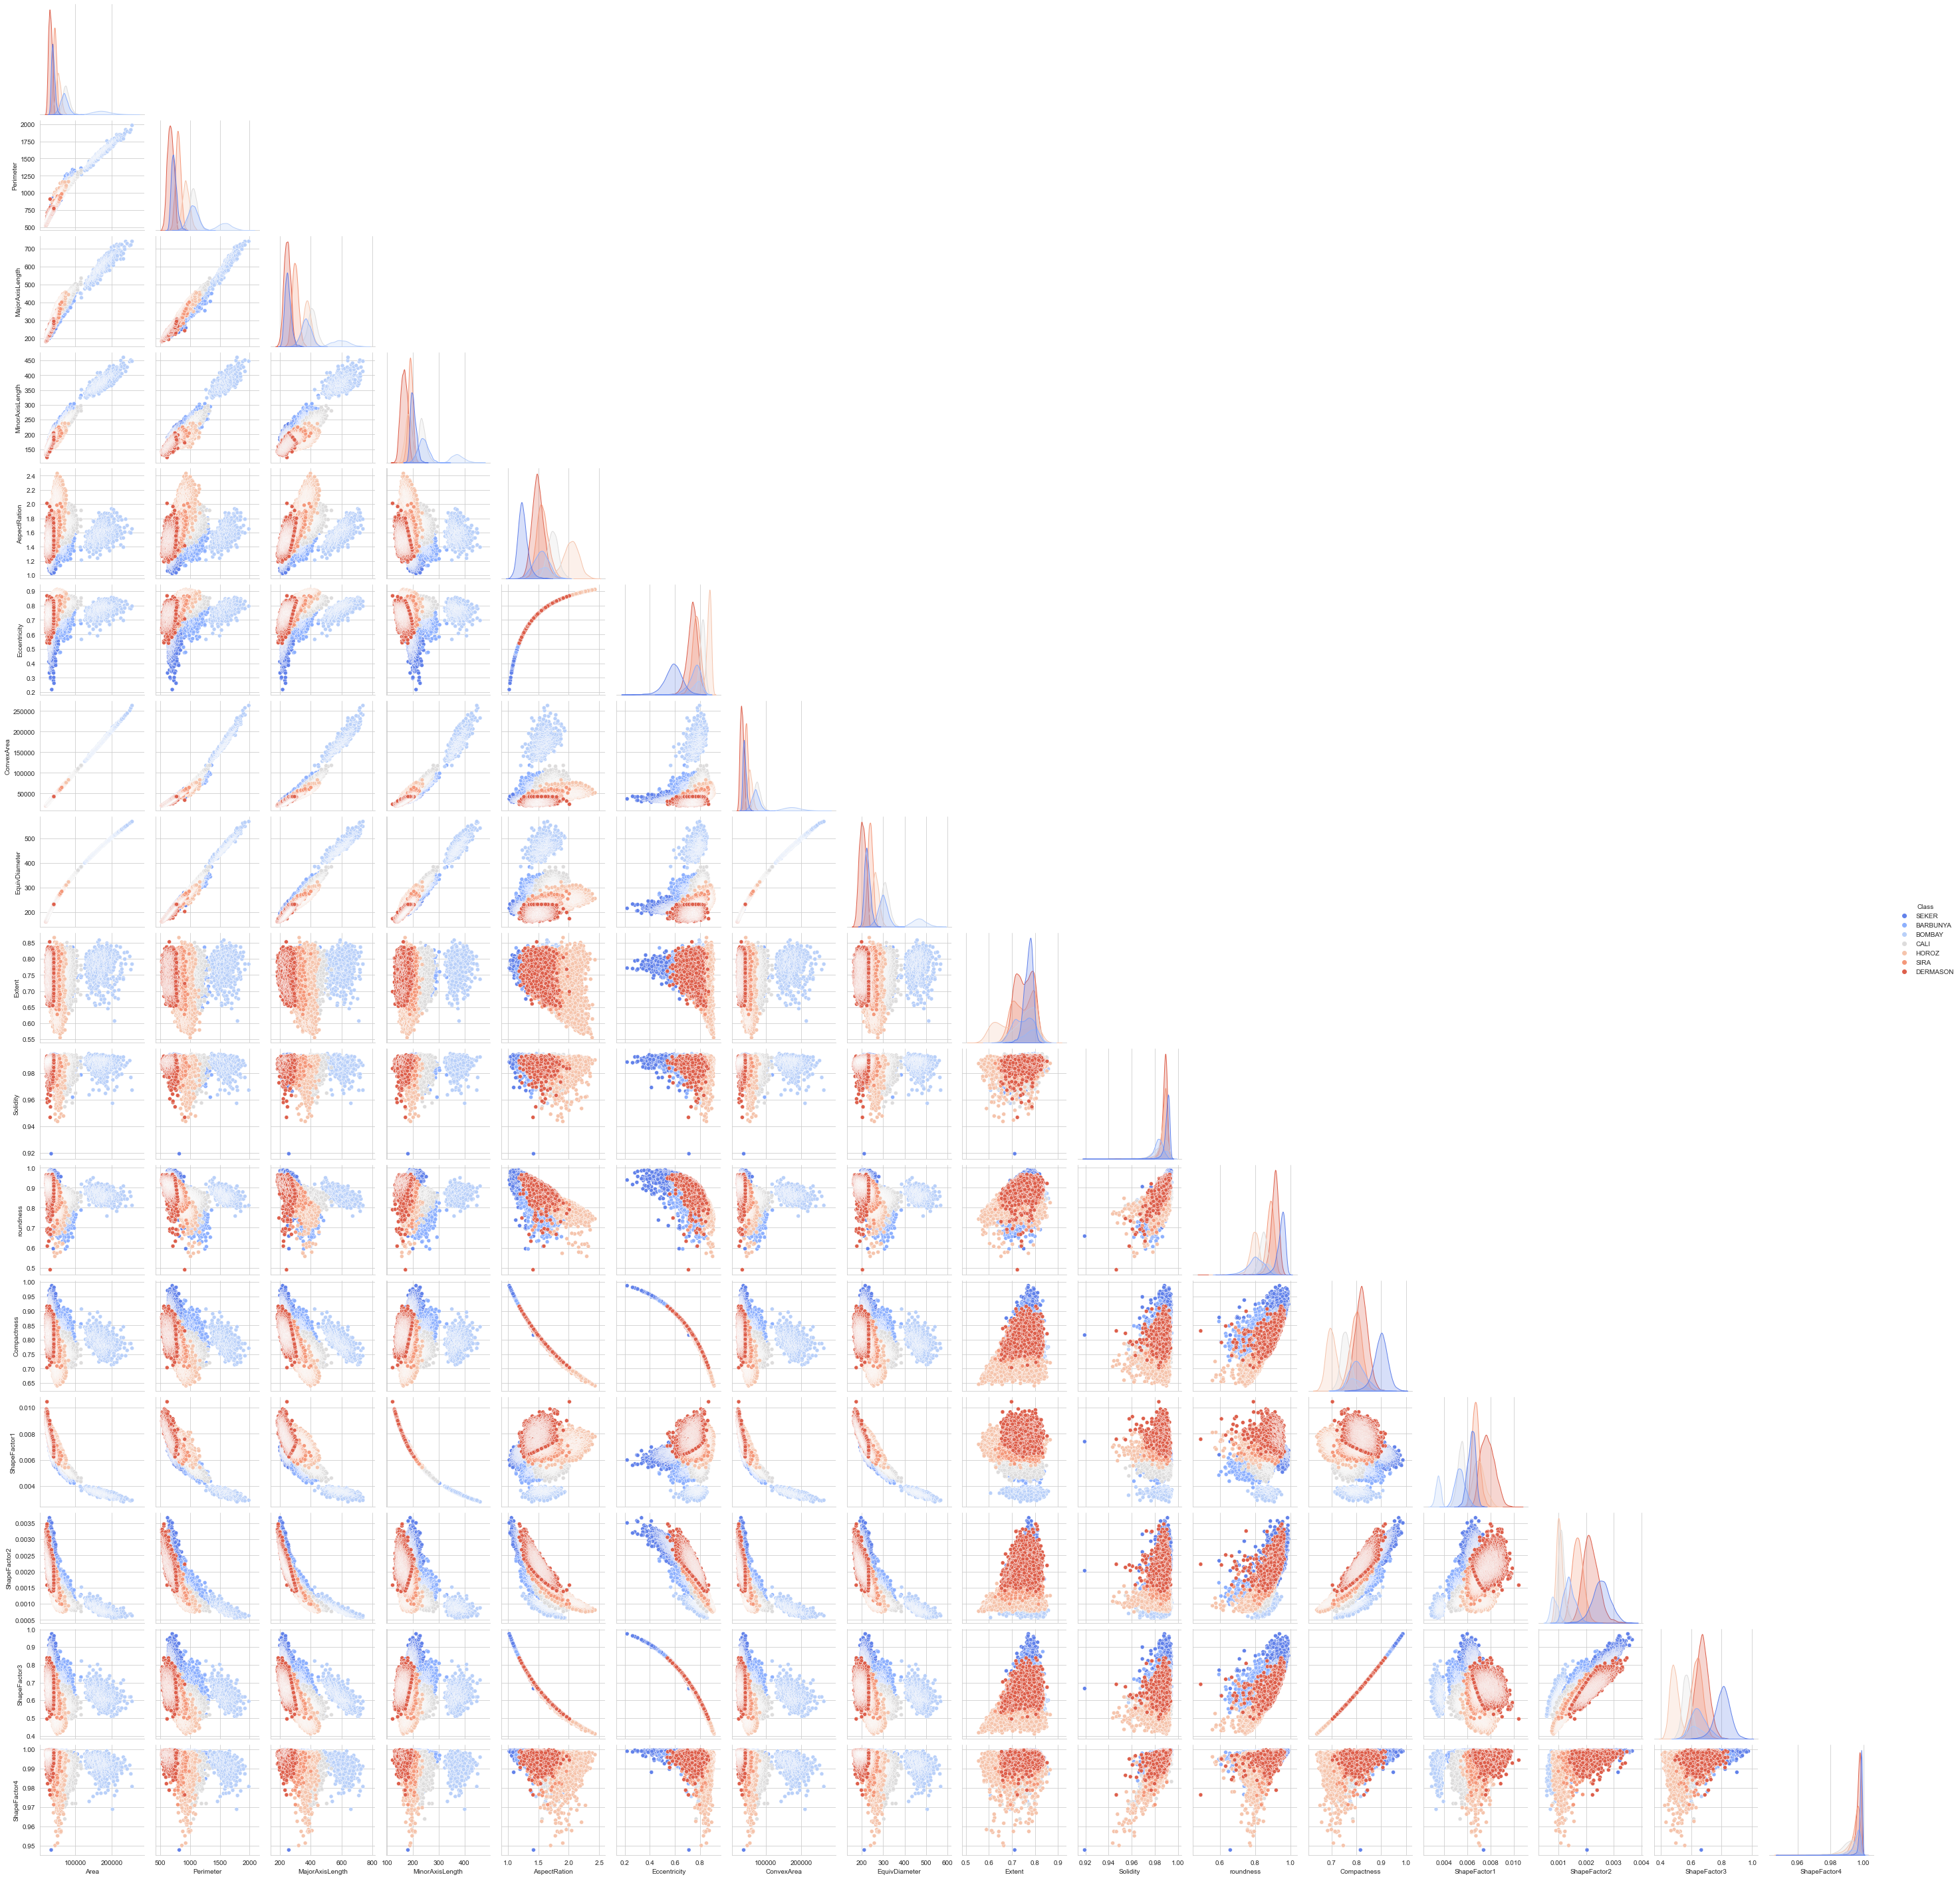

In [26]:
sns.pairplot(df, hue='Class', corner=True, palette='coolwarm')
plt.show()

## Model Training

In [27]:
model = LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)

In [28]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [29]:
LogisticRegression().solver

'lbfgs'

In [30]:
params = {
    'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'multi_class':['ovr', 'multinomial']
}

In [32]:
clf = GridSearchCV(
    model,
    param_grid=params,
    scoring=f1_score,
    cv=5
)

In [33]:
clf.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, verbose=1),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag']},
             scoring=<function f1_score at 0x13ba6d7e0>)

In [34]:
model = clf.best_estimator_

In [35]:
y_pred = model.predict(x_test)

In [36]:
y_pred

array(['SEKER', 'SEKER', 'SEKER', ..., 'BOMBAY', 'BARBUNYA', 'BOMBAY'],
      dtype=object)

## Model Testing

In [37]:
print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 91.4%


In [38]:
print(f'The model f1 score is: {np.round(f1_score(y_test, y_pred, average="""weighted"""), decimals=3)*100}%')

The model f1 score is: 91.4%


<Figure size 1440x1440 with 0 Axes>

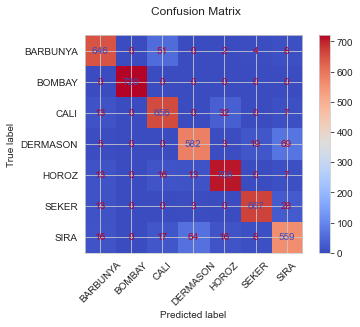

In [41]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.xticks(rotation=45)
plt.suptitle('Confusion Matrix')
plt.show()

## Export the model

In [55]:
joblib.dump(model, '../../../data/LogisticsRegressionDryBeansClassification.pkl')

['../../../data/LogisticsRegressionDryBeansClassification.pkl']

## Model Scoring

In [56]:
# Load the model
the_model = joblib.load('../../../data/LogisticsRegressionDryBeansClassification.pkl')

In [60]:
# Model Scoring - DataFrame
dfresult = the_model.predict(x_test)

In [61]:
dfresult

array(['SEKER', 'SEKER', 'SEKER', ..., 'BOMBAY', 'BARBUNYA', 'BOMBAY'],
      dtype=object)